#Data Set

In [60]:


import pandas as pd

df = pd.read_csv("Womens Clothing E-Commerce Reviews (2).csv")

# Find Null

In [61]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


# Null Handling

In [32]:
# Get the most frequent value (mode) from 'Review Text'
mode_value = df['Review Text'].mode()[0]

# Fill missing values in 'Review Text' with the mode
df['Review Text'] = df['Review Text'].fillna(mode_value)



# Get the most frequent value (mode) from 'Review Text'
mode_value = df['Title'].mode()[0]

# Fill missing values in 'Review Text' with the mode
df['Title'] = df['Title'].fillna(mode_value)



# Get the most frequent value (mode) from 'Review Text'
mode_value = df['Division Name'].mode()[0]

# Fill missing values in 'Review Text' with the mode
df['Division Name'] = df['Division Name'].fillna(mode_value)


# Get the most frequent value (mode) from 'Review Text'
mode_value = df['Department Name'].mode()[0]

# Fill missing values in 'Review Text' with the mode
df['Department Name'] = df['Department Name'].fillna(mode_value)


# Get the most frequent value (mode) from 'Review Text'
mode_value = df['Class Name'].mode()[0]

# Fill missing values in 'Review Text' with the mode
df['Class Name'] = df['Class Name'].fillna(mode_value)


#  Clean and preprocess the review text



In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import pandas as pd
import re  # Import re for regex functionality
import nltk
nltk.download('punkt_tab')

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import nltk
nltk.download('punkt')

# Initialize the lemmatizer, stemmer, and stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def pre_procesing(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ""  # Return an empty string if it's not a string (e.g., NaN or float)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Lemmatize and stem tokens
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]

    # Remove punctuation and special characters
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    return ' '.join(tokens)

# Assuming df is your DataFrame
# Apply the preprocessing function to the 'Review Text' column inplace
df["Review Text"] = df["Review Text"].apply(pre_procesing)

# Print first few rows of cleaned text
print(df["Review Text"].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                    absolut wonder silki sexi comfort
1    love thi dress sooo pretti happen find store g...
2    high hope thi dress realli want work initi ord...
3    love love love thi jumpsuit fun flirti fabul e...
4    thi shirt veri flatter due adjust front tie pe...
Name: Review Text, dtype: object


#Features Engneering

In [34]:
def create_sentiment(rating):
    if rating <= 2:
        return 0   # Negative
    elif rating == 3:
        return 1   # Neutral
    else:
        return 2   # Positive


In [35]:
import pandas as pd



df["sentiment"] = df["Rating"].apply(create_sentiment)

X = df["Review Text"]
y = df["sentiment"]


In [36]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,0,767,33,Love it!,absolut wonder silki sexi comfort,4,1,0,Initmates,Intimate,Intimates,2
1,1,1080,34,Love it!,love thi dress sooo pretti happen find store g...,5,1,4,General,Dresses,Dresses,2
2,2,1077,60,Some major design flaws,high hope thi dress realli want work initi ord...,3,0,0,General,Dresses,Dresses,1
3,3,1049,50,My favorite buy!,love love love thi jumpsuit fun flirti fabul e...,5,1,0,General Petite,Bottoms,Pants,2
4,4,847,47,Flattering shirt,thi shirt veri flatter due adjust front tie pe...,5,1,6,General,Tops,Blouses,2
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,wa veri happi snag thi dress great price veri ...,5,1,0,General Petite,Dresses,Dresses,2
23482,23482,862,48,Wish it was made of cotton,remind matern cloth soft stretchi shini materi...,3,1,0,General Petite,Tops,Knits,1
23483,23483,1104,31,"Cute, but see through",thi fit well top wa veri see thi never would w...,3,0,1,General Petite,Dresses,Dresses,1
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",bought thi dress wed thi summer cute unfortun ...,3,1,2,General,Dresses,Dresses,1


#Rating Distribution

/tmp/ipython-input-1908106749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


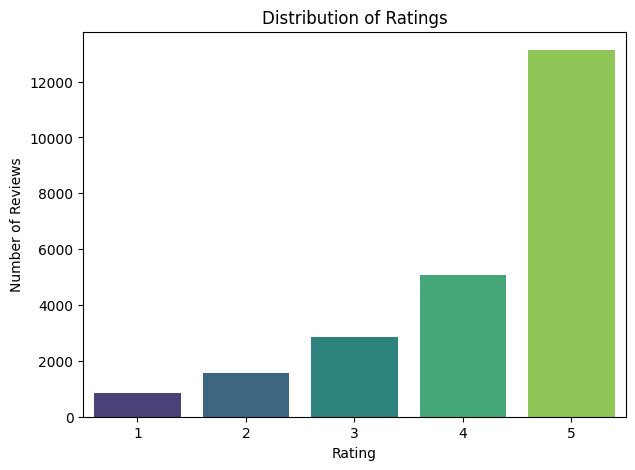

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#See how many reviews per rating (1–5)
plt.figure(figsize=(7,5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


# Recommended vs Not Recommended



/tmp/ipython-input-4235929058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended IND', data=df, palette='coolwarm')


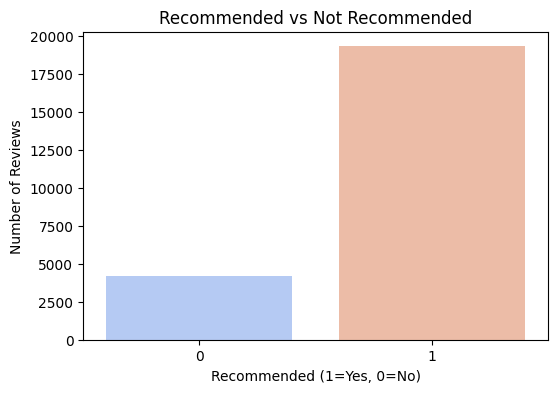

In [42]:

plt.figure(figsize=(6,4))
sns.countplot(x='Recommended IND', data=df, palette='coolwarm')
plt.title("Recommended vs Not Recommended")
plt.xlabel("Recommended (1=Yes, 0=No)")
plt.ylabel("Number of Reviews")
plt.show()


#Positive Feedback Count Distribution

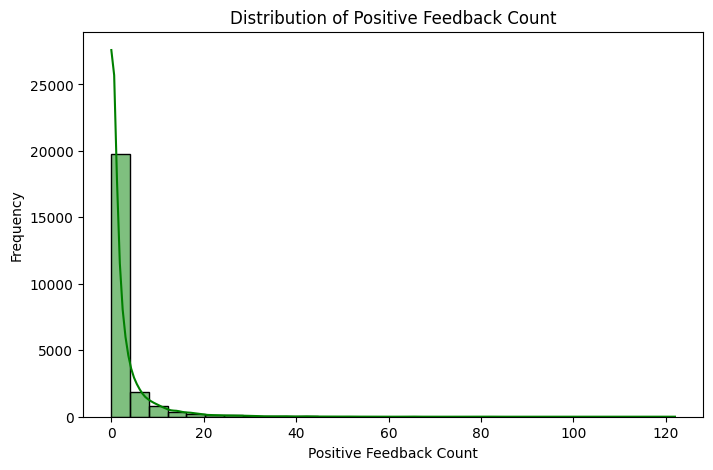

In [43]:

plt.figure(figsize=(8,5))
sns.histplot(df['Positive Feedback Count'], bins=30, kde=True, color='green')
plt.title("Distribution of Positive Feedback Count")
plt.xlabel("Positive Feedback Count")
plt.ylabel("Frequency")
plt.show()


#Average Rating by Department

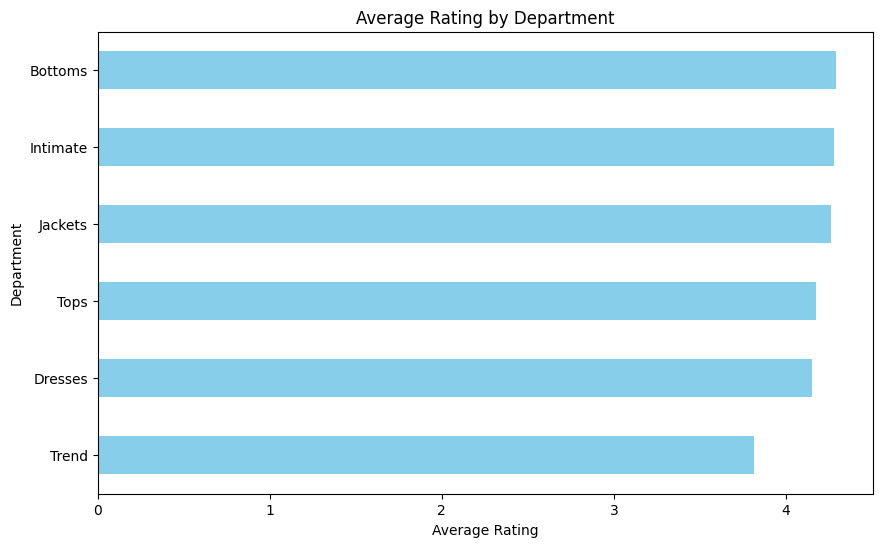

In [46]:

avg_rating = df.groupby('Department Name')['Rating'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_rating.plot(kind='barh', color='skyblue')
plt.title("Average Rating by Department")
plt.xlabel("Average Rating")
plt.ylabel("Department")
plt.show()


# Word Cloud of Reviews (Visual Trend Analysis)

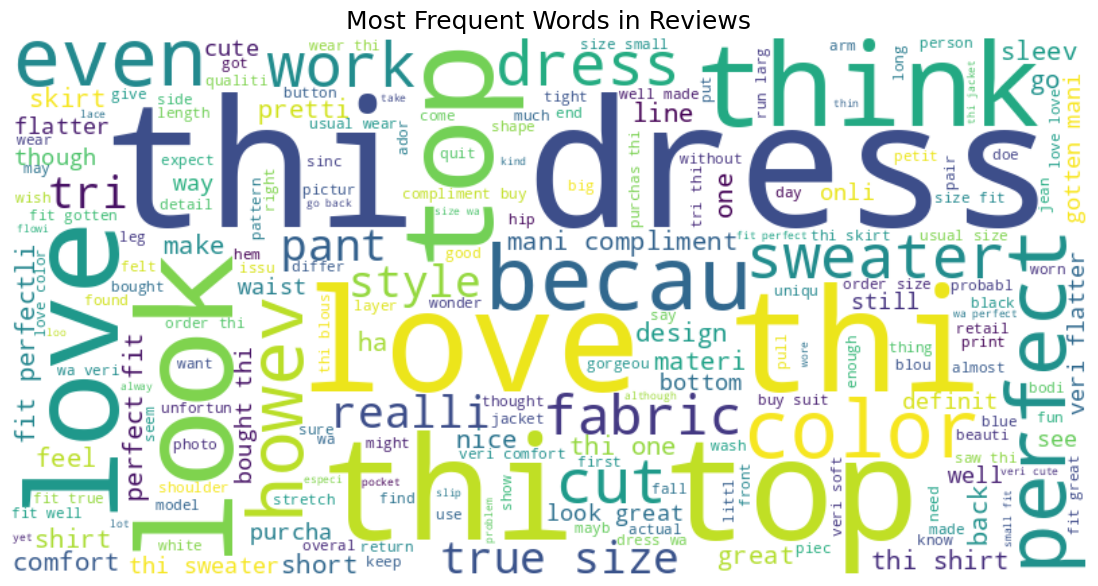

In [49]:


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(review for review in df['Review Text'].dropna())

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=200,
    width=800,
    height=400
).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Reviews", fontsize=18)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Data Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#TFIDF Vectorizer

In [17]:
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


# LogisticRegression

In [19]:
lr_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    n_jobs=-1
)

lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("LOGISTIC REGRESSION RESULTS")
print("--------------------------------")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


LOGISTIC REGRESSION RESULTS
--------------------------------
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       482
           1       0.34      0.47      0.40       574
           2       0.94      0.87      0.90      3642

    accuracy                           0.79      4698
   macro avg       0.59      0.63      0.61      4698
weighted avg       0.82      0.79      0.80      4698

Confusion Matrix:
[[ 271  153   58]
 [ 159  270  145]
 [ 115  369 3158]]


# Support Vector Classification

In [20]:
svm_model = SVC(
    kernel='linear',      # TEXT data → linear is BEST
    class_weight='balanced'
)

svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("\nSVM RESULTS")
print("--------------------------------")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



SVM RESULTS
--------------------------------
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       482
           1       0.36      0.49      0.41       574
           2       0.94      0.87      0.90      3642

    accuracy                           0.79      4698
   macro avg       0.59      0.63      0.60      4698
weighted avg       0.82      0.79      0.80      4698

Confusion Matrix:
[[ 254  164   64]
 [ 153  279  142]
 [ 144  338 3160]]


# Ensemble Model Training & Evaluation

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Base models
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)  # <-- probability=True

# Ensemble (soft voting)
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('svm', svm_model)
    ],
    voting='soft',
    weights=[1, 2]     # SVM slightly higher weight
)

# Train ensemble
ensemble_model.fit(X_train_tfidf, y_train)

# Predict & evaluate
y_pred = ensemble_model.predict(X_test_tfidf)

from sklearn.metrics import classification_report
print("ENSEMBLE MODEL RESULTS")
print("--------------------------------")
print(classification_report(y_test, y_pred))


ENSEMBLE MODEL RESULTS
--------------------------------
              precision    recall  f1-score   support

           0       0.54      0.48      0.51       482
           1       0.40      0.34      0.37       574
           2       0.91      0.94      0.92      3642

    accuracy                           0.82      4698
   macro avg       0.62      0.59      0.60      4698
weighted avg       0.81      0.82      0.81      4698



In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# ======================
# Imports
# ======================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Ensemble'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred)
    ],
    'F1 Macro': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred, average='macro')
    ]
})

print("\nMODEL COMPARISON")
print("--------------------------------")
print(results)



MODEL COMPARISON
--------------------------------
                 Model  Accuracy  F1 Macro
0  Logistic Regression  0.787356  0.608322
1                  SVM  0.786079  0.601802
2             Ensemble  0.819711  0.599533


# Model Comparison Table with Precision, Recall, F1

In [59]:

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Ensemble'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred)
    ],
    'Precision (Macro)': [
        f1_score(y_test, y_pred_lr, average='macro', labels=None, zero_division=0),
        f1_score(y_test, y_pred_svm, average='macro', labels=None, zero_division=0),
        f1_score(y_test, y_pred, average='macro', labels=None, zero_division=0)
    ],
    'Recall (Macro)': [
        f1_score(y_test, y_pred_lr, average='macro', labels=None, zero_division=0),
        f1_score(y_test, y_pred_svm, average='macro', labels=None, zero_division=0),
        f1_score(y_test, y_pred, average='macro', labels=None, zero_division=0)
    ],
    'F1 Macro': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred, average='macro')
    ]
})

print("\nMODEL COMPARISON")
print("--------------------------------")
print(results)



MODEL COMPARISON
--------------------------------
                 Model  Accuracy  Precision (Macro)  Recall (Macro)  F1 Macro
0  Logistic Regression  0.787356           0.608322        0.608322  0.608322
1                  SVM  0.786079           0.601802        0.601802  0.601802
2             Ensemble  0.819711           0.599533        0.599533  0.599533
